In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
single_image=x_train[0]

In [7]:
single_image.shape

(28, 28)

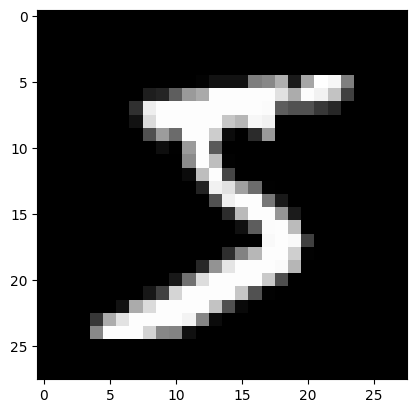

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
x_train.min()

0

In [11]:
x_train.max()

255

In [12]:
x_train_scaled=x_train/255.0
x_test_scaled=x_test/255.0

In [13]:
x_train_scaled.min()

0.0

In [14]:
x_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot=utils.to_categorical(y_train,10)
y_test_onehot=utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

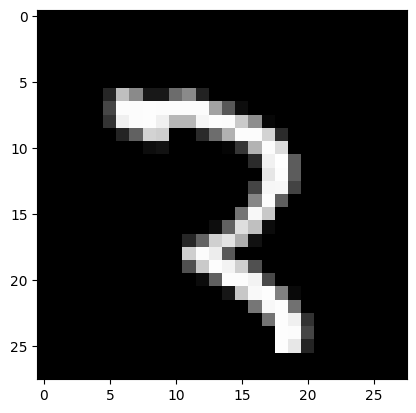

In [19]:
single_image=x_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
x_train_scaled = x_train_scaled.reshape(-1,28,28,1)
x_test_scaled = x_test_scaled.reshape(-1,28,28,1)

In [22]:
model = keras.Sequential()
model.add (layers.Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (25, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                        

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [25]:
model.fit(x_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(x_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 33s 34ms/step - loss: 0.2715 - accuracy: 0.9220 - val_loss: 0.0968 - val_accuracy: 0.9726
Epoch 2/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0827 - accuracy: 0.9761 - val_loss: 0.0596 - val_accuracy: 0.9803
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0508 - val_accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0509 - val_accuracy: 0.9819
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0459 - val_accuracy: 0.9848


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.271464,0.922017,0.096770,0.9726
1,0.082654,0.976117,0.059603,0.9803
2,0.055328,0.983417,0.050819,0.9827
3,0.041363,0.987633,0.050873,0.9819
4,0.033121,0.990100,0.045894,0.9848


PRAVINRAJJ G.K : 212222240080


<Axes: >

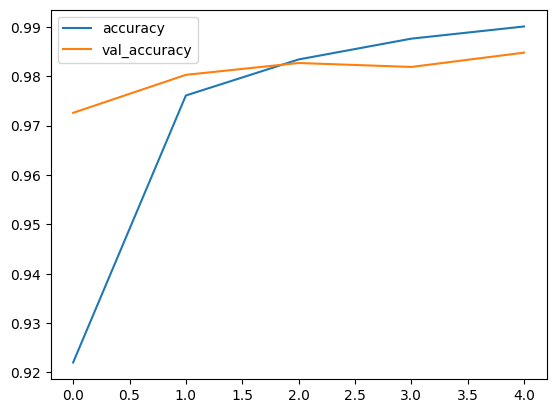

In [50]:
print("PRAVINRAJJ G.K : 212222240080")
metrics[['accuracy','val_accuracy']].plot()

PRAVINRAJJ G.K : 212222240080


<Axes: >

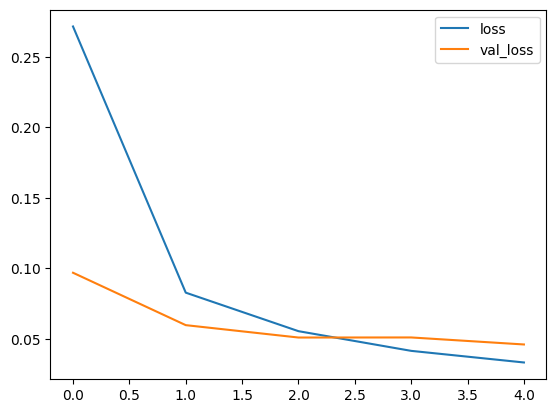

In [40]:
print("PRAVINRAJJ G.K : 212222240080")
metrics[['loss','val_loss']].plot()

In [41]:
x_test_predictions = np.argmax(model.predict(x_test_scaled), axis=1)

313/313 [==============================] - 3s 10ms/step


In [42]:
print("PRAVINRAJJ G.K : 212222240080")
print(confusion_matrix(y_test,x_test_predictions))

PRAVINRAJJ G.K : 212222240080
[[ 968    0    4    0    0    1    4    1    2    0]
 [   0 1130    2    0    1    0    1    0    1    0]
 [   2    2 1020    0    1    0    0    5    2    0]
 [   0    0    0 1003    0    1    1    2    3    0]
 [   0    0    1    0  974    0    1    0    1    5]
 [   2    0    0    9    0  875    3    0    2    1]
 [   4    3    0    0    2    1  943    0    5    0]
 [   0    3   10    0    2    0    0 1011    1    1]
 [   5    0    4    1    2    1    0    4  955    2]
 [   0    3    0    4   14    2    0    9    8  969]]


In [43]:
print("PRAVINRAJJ G.K : 212222240080")
print(classification_report(y_test,x_test_predictions))

PRAVINRAJJ G.K : 212222240080
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [44]:
img = image.load_img('two.png')

In [45]:
type(img)

PIL.Image.Image

In [46]:
img = image.load_img('two.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [47]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [48]:
print("PRAVINRAJJ G.K : 212222240080")
print(x_single_prediction)

PRAVINRAJJ G.K : 212222240080
[2]


PRAVINRAJJ G.K : 212222240080


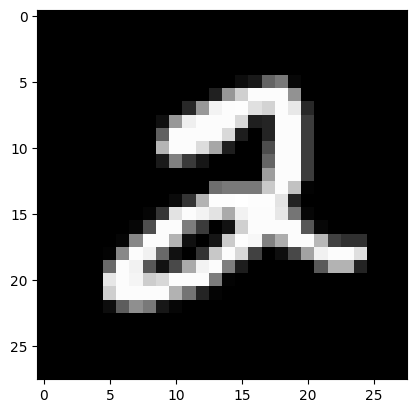

In [49]:
print("PRAVINRAJJ G.K : 212222240080")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')